In [2]:
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt

In [4]:
file_path = "/pscratch/sd/r/rmastand/particlemind/data/p8_ee_tt_ecm365_parquetfiles/reco_p8_ee_tt_ecm365_60000.parquet"

data = ak.from_parquet(file_path)

In [7]:
print(data["calo_hit_features"])

[{type: [1010, 11010, ..., 21032], energy: [...], 'position.x': ..., ...}, ...]


In [66]:
all_features = []

for event_i in range(100):
    calo_hit_features = data["calo_hit_features"][event_i]


    calo_hit_features = np.column_stack(
        (
            calo_hit_features["position.x"].to_numpy() / 1e4,
            calo_hit_features["position.y"].to_numpy()/ 1e4,
            calo_hit_features["position.z"].to_numpy()/ 1e4,
            np.log(calo_hit_features["energy"].to_numpy()  * 1e2) / 10,
            calo_hit_features["type"].to_numpy() ,
            calo_hit_features["subdetector"].to_numpy() ,
        )
    )
    all_features.append(calo_hit_features)

all_features = np.concatenate(all_features)
print(all_features.shape)

(875394, 6)


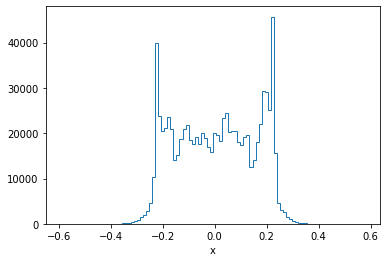

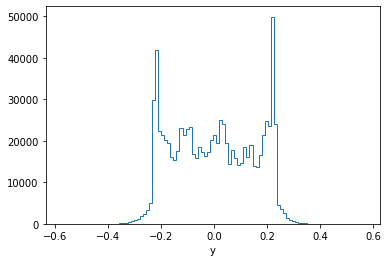

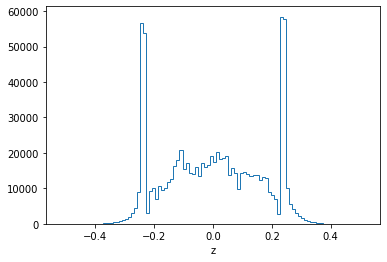

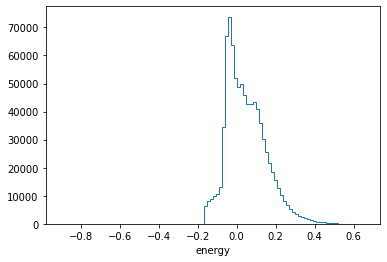

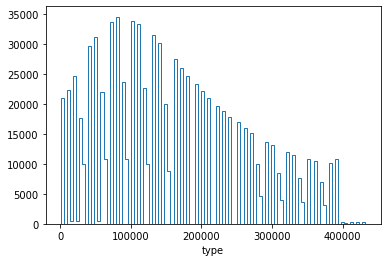

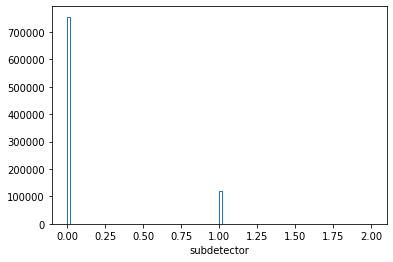

In [67]:
labels = ["x", "y", "z", "energy", "type", "subdetector"]

for i in range(6):

    plt.figure()
    plt.hist(all_features[:,i], bins = 100, histtype = "step")
    plt.xlabel(labels[i])
    plt.show()